### **0. Set-up**

In [24]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [25]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f1.csv")

In [26]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f1.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [27]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [28]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.1,0.10,0.01,0.0,0.05,0.2,0.10,0.10,0.0,0.05,0.0,2.0,0.03,0.10,0.18
1,slim,intelligent,0.9,0.95,0.95,8.0,9.50,0.9,0.95,0.95,0.4,0.95,9.0,9.0,0.97,0.95,0.79
2,hard,moeilijk,0.4,0.20,0.10,2.0,2.00,0.1,0.05,0.20,0.1,0.10,2.0,3.0,0.00,0.05,0.39
3,gelukkig,vrolijk,0.8,0.80,0.80,6.0,8.50,0.7,0.85,0.85,0.6,0.80,8.0,8.0,0.83,0.80,0.76
4,hard,stoer,0.7,0.40,0.45,2.0,6.00,0.5,0.05,0.65,0.4,0.20,4.0,6.0,0.61,0.50,0.44
5,snel,razendsnel,1.0,0.90,0.90,9.0,9.00,1.0,0.95,0.95,1.0,0.90,10.0,9.0,1.00,1.00,0.89
6,gelukkig,blij,0.9,0.85,0.85,8.0,8.50,0.8,0.80,0.90,0.9,0.90,9.0,8.0,0.77,0.85,0.79
7,kort,lang,0.1,0.05,0.05,0.0,0.05,0.1,0.10,0.15,0.1,0.10,1.0,1.0,0.02,0.10,0.17
8,dom,stom,0.7,0.85,0.70,8.0,8.50,0.7,0.80,0.60,0.6,0.10,7.0,8.0,0.67,0.70,0.77
9,vreemd,eigenaardig,1.0,0.70,0.85,10.0,9.50,0.9,0.90,0.90,1.0,0.90,10.0,10.0,0.97,1.00,0.89


In [29]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.05,0.10,1.00,1.0,0.20,0.10,0.15,1.5,0.10,0.15,3.5,0.01,0.20,1.00,0.10
1,smart,intelligent,0.90,0.95,1.00,1.0,0.96,0.95,0.95,9.5,0.95,0.90,9.5,0.93,0.95,0.94,1.00
2,hard,difficult,0.90,0.80,0.71,1.0,0.92,0.90,0.90,8.0,0.85,0.80,7.0,0.85,0.85,0.97,0.85
3,happy,cheerful,0.80,0.80,0.90,0.0,0.70,0.75,0.80,8.5,0.85,0.80,8.0,0.81,0.70,0.86,0.90
4,hard,easy,0.10,0.10,0.10,0.0,0.16,0.05,0.20,2.0,0.20,0.20,2.0,0.15,0.10,0.22,0.10
5,fast,rapid,0.90,0.90,1.00,1.0,0.94,0.85,0.95,9.5,0.95,0.90,9.0,0.97,0.90,0.94,1.00
6,happy,glad,0.80,0.85,0.85,0.0,0.82,0.80,0.75,8.5,0.90,0.80,7.0,0.86,0.80,0.83,0.90
7,short,long,0.90,0.75,0.67,1.0,0.86,0.80,0.80,8.0,0.80,0.85,8.0,0.75,0.70,0.91,0.10
8,stupid,dumb,0.85,0.90,1.00,1.0,0.91,0.90,0.90,9.0,0.90,0.90,8.0,0.85,0.90,0.94,1.00
9,weird,strange,0.90,0.90,1.00,1.0,0.96,0.95,0.90,9.5,0.85,0.85,9.0,0.93,0.90,0.94,0.90


### **1. Data Processing**

In [30]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.20,0.50
1,slim,intelligent,3.01,3.67
2,hard,moeilijk,0.71,0.99
3,gelukkig,vrolijk,2.61,3.18
4,hard,stoer,1.53,2.06
5,snel,razendsnel,3.17,3.80
6,gelukkig,blij,2.85,3.45
7,kort,lang,0.21,0.33
8,dom,stom,2.58,3.32
9,vreemd,eigenaardig,3.30,4.11


In [31]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.61,0.93
1,smart,intelligent,2.09,3.01
2,hard,difficult,1.75,2.34
3,happy,cheerful,1.74,2.65
4,hard,easy,0.38,0.66
5,fast,rapid,2.05,2.93
6,happy,glad,1.70,2.48
7,short,long,1.73,2.56
8,stupid,dumb,1.93,2.67
9,weird,strange,2.03,2.93


In [32]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.20,0.50,old,new,0.61,0.93
1,slim,intelligent,3.01,3.67,smart,intelligent,2.09,3.01
2,hard,moeilijk,0.71,0.99,hard,difficult,1.75,2.34
3,gelukkig,vrolijk,2.61,3.18,happy,cheerful,1.74,2.65
4,hard,stoer,1.53,2.06,hard,easy,0.38,0.66
5,snel,razendsnel,3.17,3.80,fast,rapid,2.05,2.93
6,gelukkig,blij,2.85,3.45,happy,glad,1.70,2.48
7,kort,lang,0.21,0.33,short,long,1.73,2.56
8,dom,stom,2.58,3.32,stupid,dumb,1.93,2.67
9,vreemd,eigenaardig,3.30,4.11,weird,strange,2.03,2.93


### **2. Descriptive Statistics**

In [33]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,1.87,1.63,2.37,2.38
std,1.21,0.46,1.45,0.62
min,0.20,0.38,0.32,0.66
25%,0.57,1.39,0.85,2.34
50%,2.56,1.74,3.18,2.56
75%,2.85,1.97,3.47,2.85
max,3.30,2.09,4.11,3.01
median,2.56,1.74,3.18,2.56


#### **2.1. SimLex-999**

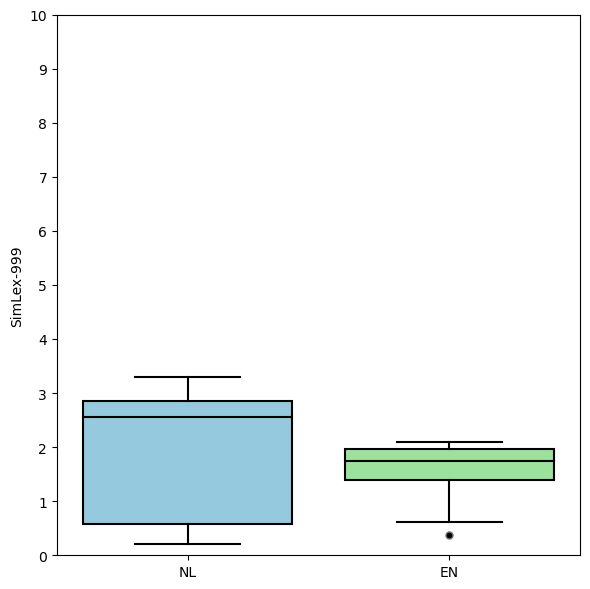

In [34]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

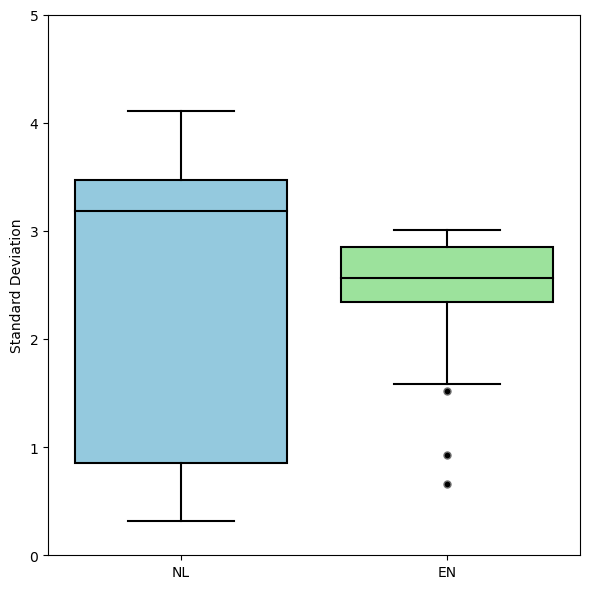

In [35]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

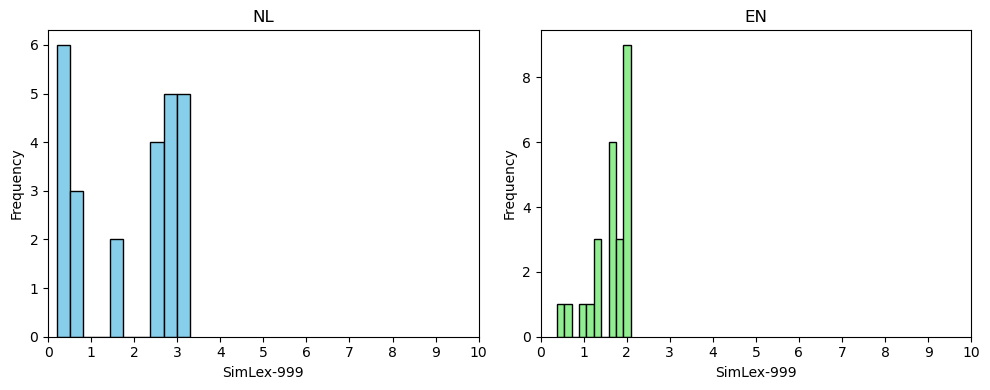

In [36]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

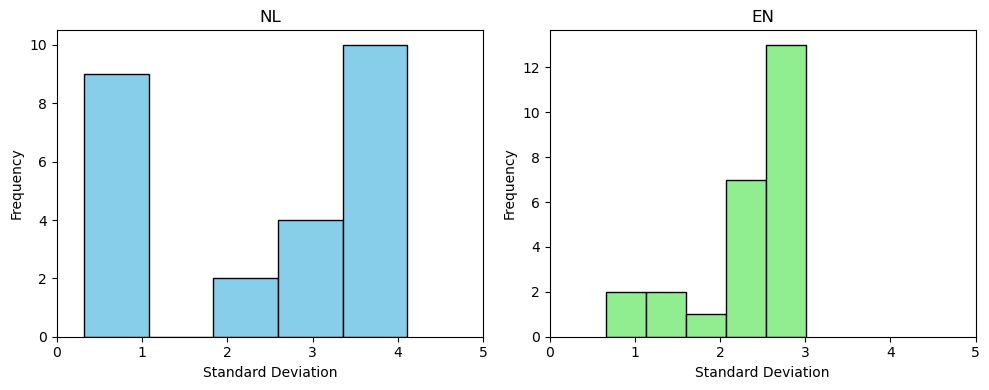

In [37]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [38]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl, nl_pred_sd


In [39]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')

No outliers found in nl_pred_sd


#### **4.2. EN**

In [40]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 1
Outliers in en_pred_sd: 3


In [41]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
    word1 word2  en_pred_sl  en_pred_sd
0     old   new        0.61        0.93
4    hard  easy        0.38        0.66
13  smart  dumb        1.07        1.52


#### **4.3. Add to Summary**

In [42]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,1.87,1.63,2.37,2.38
std,1.21,0.46,1.45,0.62
min,0.20,0.38,0.32,0.66
25%,0.57,1.39,0.85,2.34
50%,2.56,1.74,3.18,2.56
75%,2.85,1.97,3.47,2.85
max,3.30,2.09,4.11,3.01
median,2.56,1.74,3.18,2.56
outliers,0.00,1.00,0.00,3.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

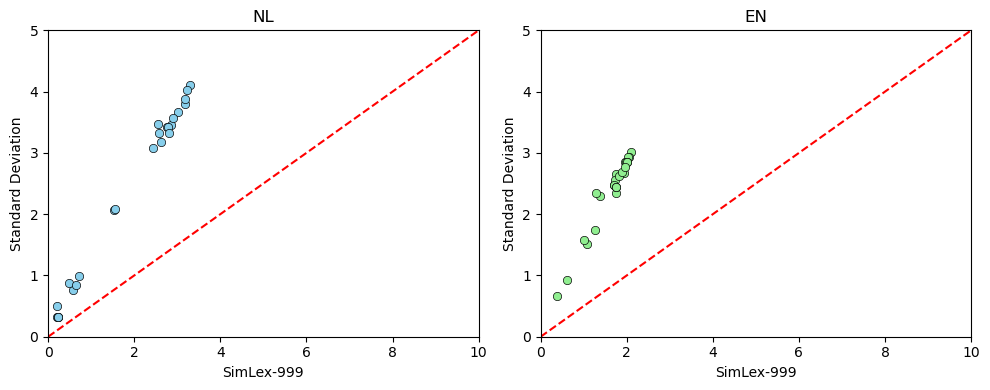

In [43]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [44]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.96553,6.107037e-15,significant
1,en_pred_sl,en_pred_sd,0.95831,5.251856e-14,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

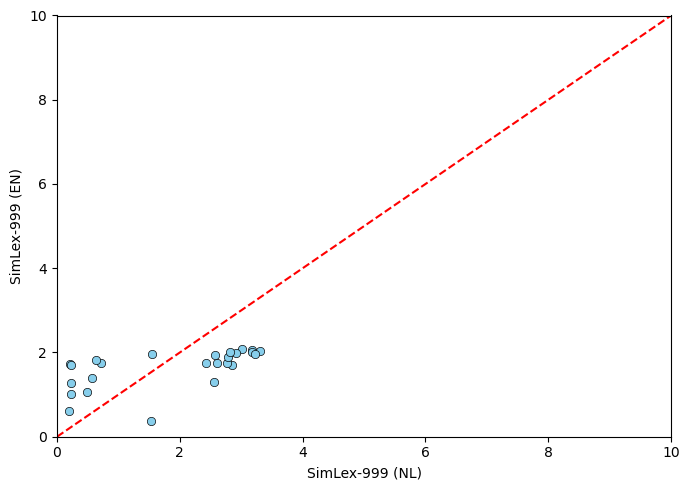

In [45]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [46]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.776
P-value: 5.152924941686121e-06
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

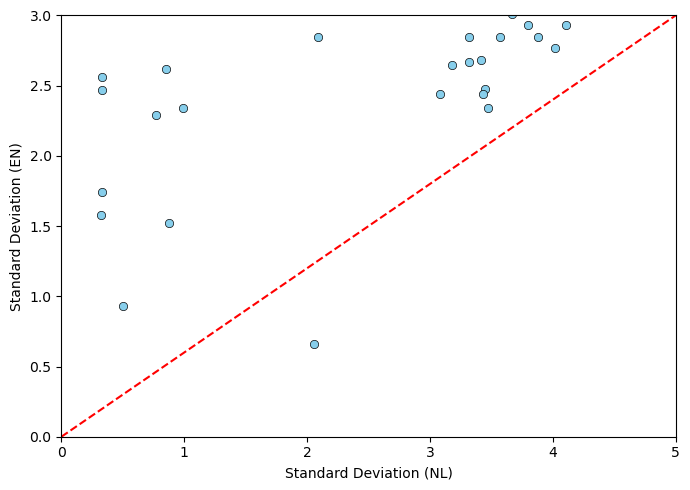

In [47]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [48]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.70263
P-value: 8.997334450529e-05
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [49]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.04


#### **7.3. Mean Absolute Error (MAE)**

In [50]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.98
